# **Simple Linear Regression**

**Import the relevant libraries**

In [2]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

**Generate random input data to train on**

In [3]:
observations = 1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

input = np.column_stack((xs,zs))

print(input)

[[-8.46087106  5.62385688]
 [ 0.37670298 -6.62147768]
 [-3.86379801 -2.5187475 ]
 ...
 [ 4.06378032  2.50835221]
 [ 8.985598    2.45577988]
 [ 3.8817475   6.76454089]]


从 均匀分布 U(-10, 10) 里随机采样数据。

xs 是一列向量，代表 第 1 个特征。

形状是 (observations, 1)，也就是有多少行就有多少个样本。

把 xs 和 zs 按列拼接成一个**矩阵**。

input 现在是形状 (observations, 2) 的数组。

每一行是一个样本[x,z]。

**Create the targets we will aim at**

In [4]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


# **Gradient Descent**

**Initialize variable**

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[0.09135028]
 [0.09732446]]
[-0.04077465]


weights：形状是 (2,1)，因为输入有 2 个特征 (xs 和 zs)。

biases：初始偏置，随机小数。

**Set a learning rate**

In [6]:
learning_rate = 0.02

learning_rate：学习率，控制更新步长。

**Train the model**

observations = 1000

一共有1000个样本，根据每个样本都会预测一个predict value，所以outputs（预测值）是matrix shape(1000,1)

output.shape(1000,1)，1000个样本减去1000个target，得到差异

再平均化误差

计算weight biases

input.T，要转制input因为这样才能和deltas_scaled相乘

deltas_scaled.shape(1000,1), input.shape(1000,2), 然后input.T.shape(2,1000) ([row*column])

In [7]:
for i in range(100):
  outputs = np.dot(input,weights) + biases # 预测结果
  deltas = outputs - targets # 预测和目标的差异

  loss = np.sum(deltas ** 2) / 2 / observations # 计算均方误差 (MSE) 的一半，损失值 越接近 0，说明预测和真实越接近，模型越好。

  print(loss)

  deltas_scaled = deltas / observations # 平均化误差

  weights = weights - learning_rate * np.dot(input.T,deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)
  # 计算weights biases

# for loop一直循环不断优化weights biases，知道loss越来越小接近0，说明算出的weights biases越来越好

234.32146737007582
35.30100094264921
14.333930848542147
11.748923965621055
11.081115236263427
10.62778347598635
10.211899818611073
9.814489590440486
9.433003782267347
9.066623459925124
8.714731644664244
8.376753421751197
8.052138450731709
7.740358343272712
7.4409056229329815
7.15329288034088
6.877051977887747
6.6117332875504395
6.356904959025404
6.112152216818232
5.877076685127317
5.651295739420929
5.434441883652149
5.226162152097915
5.0261175348486065
4.833982426013002
4.649444093740546
4.472202171198229
4.301968167673612
4.1384649990081925
3.981426536596854
3.8305971742192817
3.6857314119983315
3.546593456808132
3.4129568384815547
3.2846040411923396
3.1613261494119125
3.0429225078645987
2.9292003949278
2.8199747089454785
2.71506766694443
2.6143085152629197
2.5175332516206947
2.424584358177988
2.335310545149034
2.2495665045527775
2.167212673699959
2.0881150080316293
2.0121447629393208
1.9391782842117928
1.869096806767226
1.8017862613432998
1.7371370888304871
1.6750440619463876
1.61540

**outputs = np.dot(input, weights) + biases** 前向传播：预测值y=x⋅w+b

**deltas = outputs - targets** 误差：预测值和真实值的差。

loss = np.sum(deltas**2) / 2 / observations

print(loss)

损失函数 (Loss)：均方误差（MSE）的一半。L=2N1​∑(y^​−y)2 每次迭代打印一次，能看到损失下降的过程。

**deltas_scaled = deltas / observations** 平均化误差，避免梯度太大。

**weights = weights - learning_rate * np.dot(input.T, deltas_scaled)**

**biases = biases - learning_rate * np.sum(deltas_scaled)**

梯度下降更新公式：

权重更新：w:=w−η⋅∂w∂L​

这里用矩阵形式：Δw=XT⋅Δ

偏置更新：b:=b−η⋅(∂b/∂L)

**Print weitghts and biases and see if we have worked correctly**

In [8]:
print(weights)
print(biases)

[[ 1.99664313]
 [-2.99387182]]
[4.33236886]


算出最好的weights和biases

**Plot last output vs targets**

直线斜角度越接近45度越好

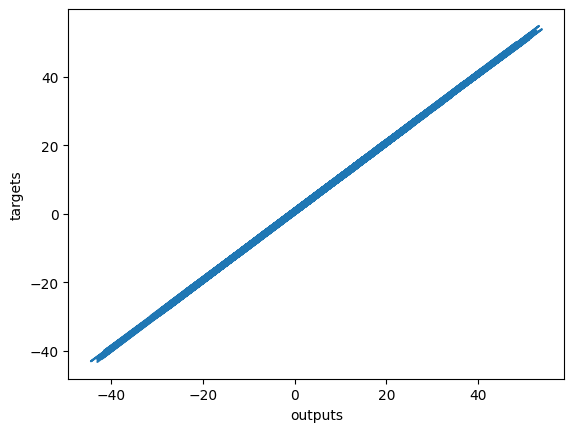

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# **不同learning rate的效率**

**2D图**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas

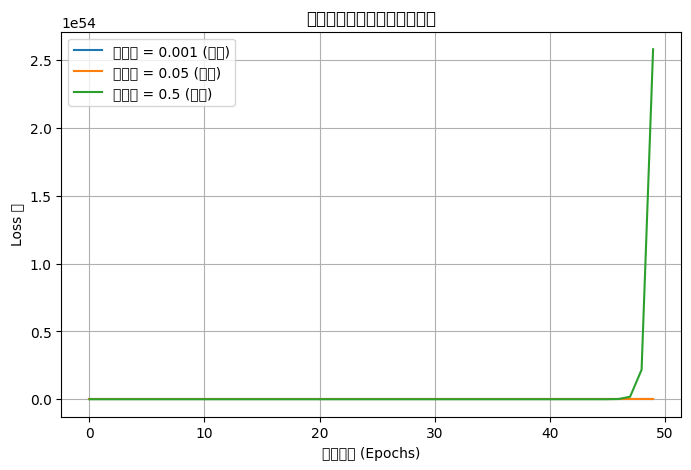

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据
np.random.seed(0)
observations = 200
x = np.random.uniform(-5, 5, (observations, 1))
z = np.random.uniform(-5, 5, (observations, 1))
input_data = np.column_stack((x, z))

# 真实参数
true_w = np.array([[2.0], [-3.0]])
true_b = 5.0
targets = input_data @ true_w + true_b + np.random.normal(0, 1, (observations, 1))

# 初始化并训练
def train_with_lr(lr, epochs=50):
    weights = np.random.uniform(-0.1, 0.1, (2, 1))
    bias = np.random.uniform(-0.1, 0.1, 1)
    losses = []
    for _ in range(epochs):
        outputs = input_data @ weights + bias
        deltas = outputs - targets
        loss = np.sum(deltas**2) / 2 / observations
        losses.append(loss)

        # 更新
        deltas_scaled = deltas / observations
        weights = weights - lr * (input_data.T @ deltas_scaled)
        bias = bias - lr * np.sum(deltas_scaled)
    return losses

# 三种不同学习率
epochs = 50
loss_lr_small = train_with_lr(0.001, epochs)
loss_lr_good = train_with_lr(0.05, epochs)
loss_lr_large = train_with_lr(0.5, epochs)

# 绘图
plt.figure(figsize=(8,5))
plt.plot(loss_lr_small, label="学习率 = 0.001 (太小)")
plt.plot(loss_lr_good, label="学习率 = 0.05 (合适)")
plt.plot(loss_lr_large, label="学习率 = 0.5 (太大)")
plt.xlabel("迭代次数 (Epochs)")
plt.ylabel("Loss 值")
plt.title("不同学习率对训练收敛的影响")
plt.legend()
plt.grid(True)
plt.show()


**3D图**

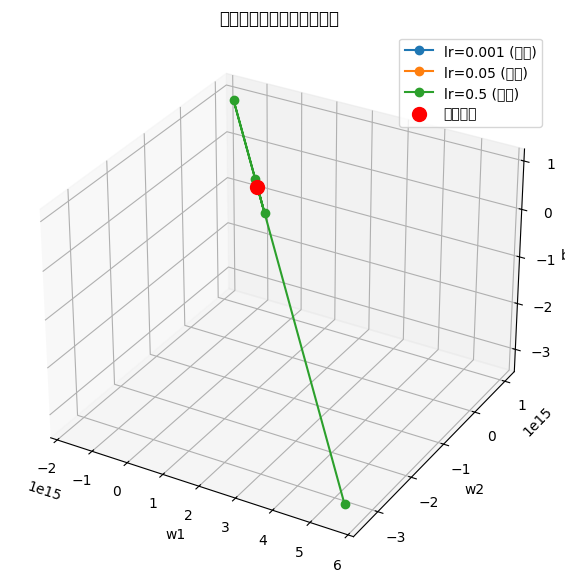

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
np.random.seed(0)
observations = 100
x = np.random.uniform(-5, 5, (observations, 1))
z = np.random.uniform(-5, 5, (observations, 1))
input_data = np.column_stack((x, z))

# 真实参数
true_w = np.array([[2.0], [-3.0]])
true_b = 5.0
targets = input_data @ true_w + true_b + np.random.normal(0, 1, (observations, 1))

# 训练函数，保存权重路径
def train_with_lr_path(lr, epochs=30):
    weights = np.random.uniform(-0.1, 0.1, (2, 1))
    bias = np.random.uniform(-0.1, 0.1, 1)
    path = []
    for _ in range(epochs):
        outputs = input_data @ weights + bias
        deltas = outputs - targets

        # 保存参数路径 (w1, w2, b)
        path.append([weights[0,0], weights[1,0], bias[0]])

        # 更新
        deltas_scaled = deltas / observations
        weights = weights - lr * (input_data.T @ deltas_scaled)
        bias = bias - lr * np.sum(deltas_scaled)
    return np.array(path)

# 三种学习率路径
path_small = train_with_lr_path(0.001)
path_good = train_with_lr_path(0.05)
path_large = train_with_lr_path(0.5)

# 绘制3D路径
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(path_small[:,0], path_small[:,1], path_small[:,2], marker='o', label="lr=0.001 (太小)")
ax.plot(path_good[:,0], path_good[:,1], path_good[:,2], marker='o', label="lr=0.05 (合适)")
ax.plot(path_large[:,0], path_large[:,1], path_large[:,2], marker='o', label="lr=0.5 (太大)")

# 真实参数点
ax.scatter(true_w[0,0], true_w[1,0], true_b, c="red", s=100, label="真实参数")

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("bias")
ax.set_title("不同学习率下参数更新路径")
ax.legend()
plt.show()
